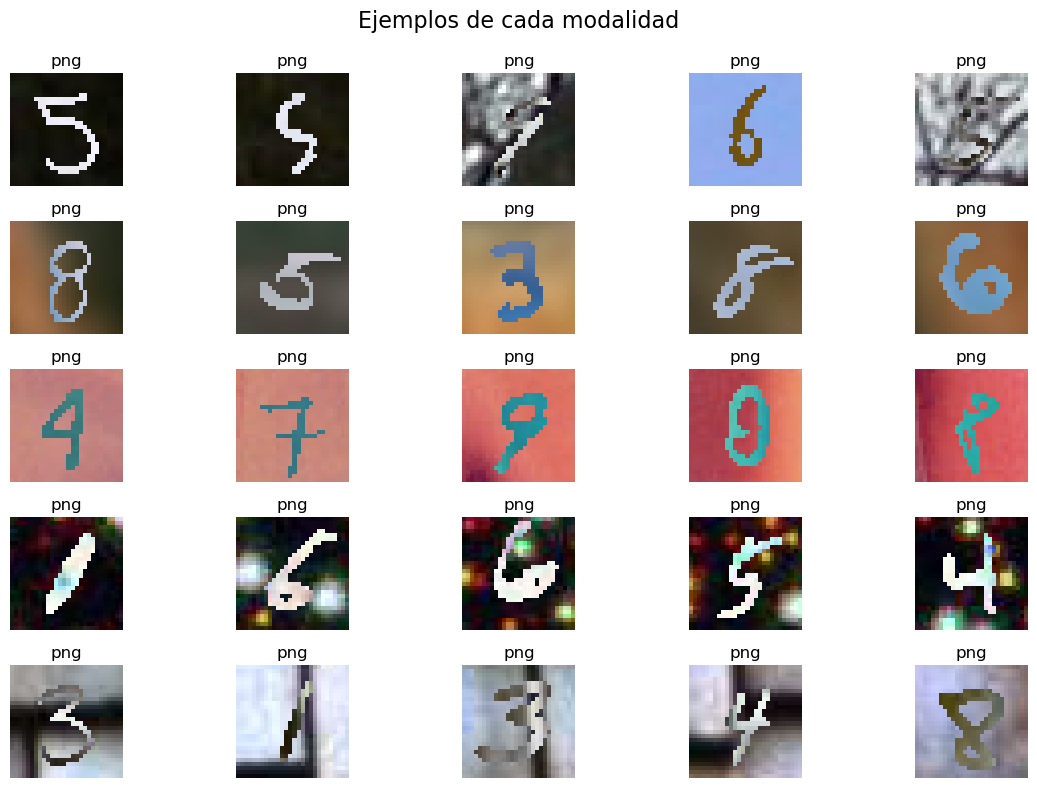

In [6]:
import os
import matplotlib.pyplot as plt
import random
from collections import Counter
from tensorflow.keras.preprocessing.image import load_img

# Ruta base de las modalidades
base_dir = "PolyMNIST/MMNIST/train"  # Ajusta si tu ruta es diferente
modalidades = ["m0", "m1", "m2", "m3", "m4"]

fig, axs = plt.subplots(len(modalidades), 5, figsize=(12, 8))
fig.suptitle("Ejemplos de cada modalidad", fontsize=16)

for i, modalidad in enumerate(modalidades):
    path = os.path.join(base_dir, modalidad)
    files = random.sample(os.listdir(path), 5)
    for j, file in enumerate(files):
        img_path = os.path.join(path, file)
        img = load_img(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis("off")
        axs[i, j].set_title(f"{file.split('.')[-1]}")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [ ]:
# Se carga una imagen de referencia para mostrar su resolución
img_ref_path = os.path.join(base_dir, "m0", os.listdir(os.path.join(base_dir, "m0"))[0])
img_ref = load_img(img_ref_path)
print("Resolución de imagen de referencia:", img_ref.size)

Resolución de imagen de referencia: (28, 28)


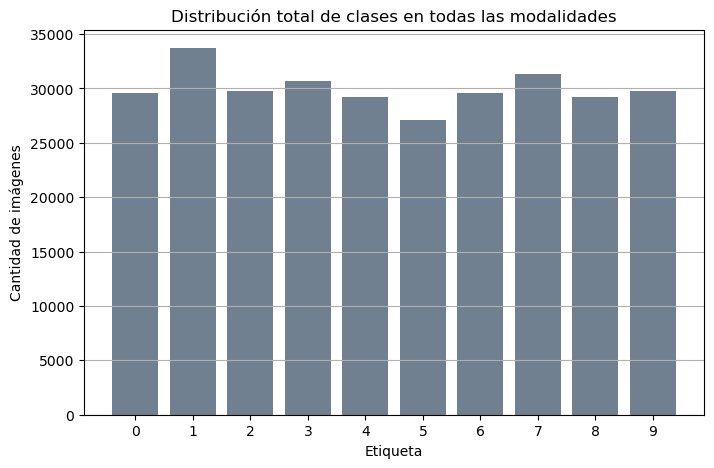

In [ ]:
# Contador de etiquetas
# Diccionario para guardar conteos por modalidad
conteo_total = Counter()
conteo_por_modalidad = {}

# Función para extraer la etiqueta desde el nombre del archivo
def extraer_etiqueta(nombre_archivo):
    try:
        return int(nombre_archivo.split(".")[-2].split("_")[-1])
    except:
        return None

# Se recorren todas las modalidades (m0, m1, m2, m3, m4)
for modalidad in modalidades:
    path = os.path.join(base_dir, modalidad)
    # Lista para almacenar etiquetas encontradas
    etiquetas = []
    for fname in os.listdir(path):
        # Solo toma imágenes PNG
        if fname.endswith(".png"):
            etiqueta = extraer_etiqueta(fname)
            if etiqueta is not None:
                etiquetas.append(etiqueta)
    # Cuenta la frecuencia de cada etiqueta            
    conteo = Counter(etiquetas)
    conteo_por_modalidad[modalidad] = conteo
    conteo_total.update(etiquetas)

# Gráfica de distribución total de clases
plt.figure(figsize=(8,5))
plt.bar(conteo_total.keys(), conteo_total.values(), color='slategrey')
plt.title("Distribución total de clases en todas las modalidades")
plt.xlabel("Etiqueta")
plt.ylabel("Cantidad de imágenes")
plt.xticks(range(10))
plt.grid(axis='y')
plt.show()

En la gráfica, se muestra la distribución global sumando todas las modalidades. El total de imágenes por clase varía entre 27,000 y 34,000 aproximadamente. La clase 1 es la que más imágenes tiene, con un poco más de 33,000 unidades. La clase 5 es la menos representada, con alrededor de 27,000 imágenes. A pesar de estas diferencias, el conjunto sigue estando bastante balanceado, ya que la diferencia máxima entre clases es de aproximadamente un 20%.

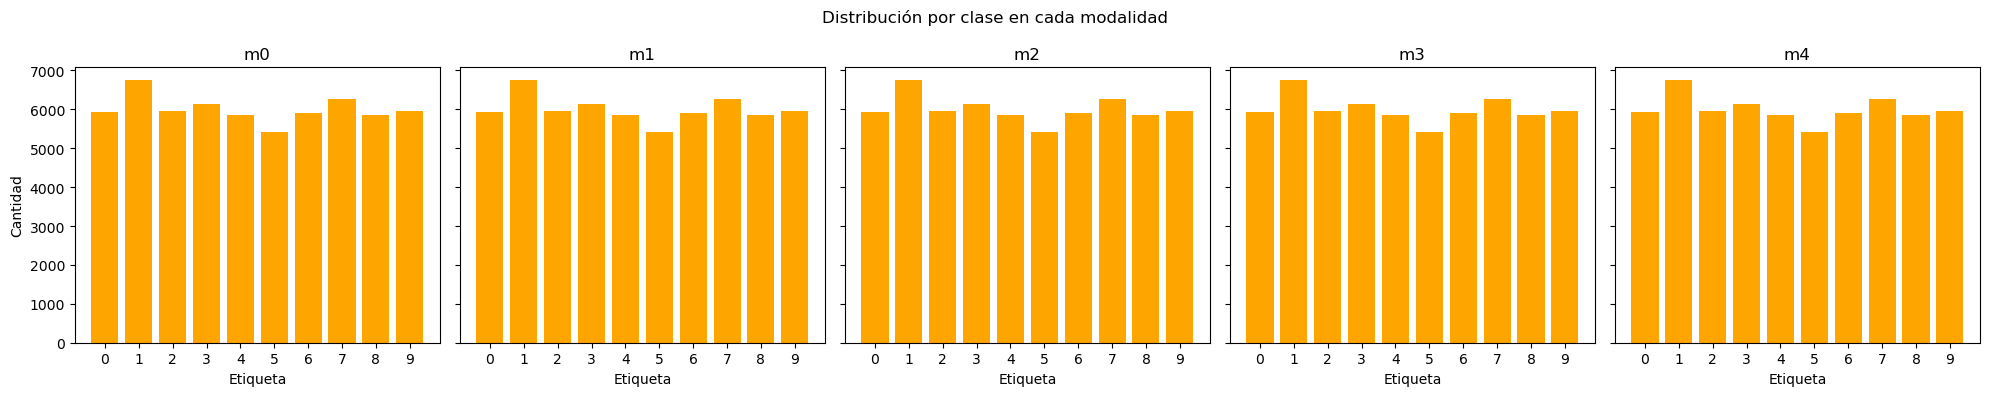

In [ ]:
# Gráfica de distribución por clase en cada modalidad
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for i, modalidad in enumerate(modalidades):
    conteo = conteo_por_modalidad[modalidad]
    axs[i].bar(conteo.keys(), conteo.values(), color='orange')
    axs[i].set_title(modalidad)
    axs[i].set_xticks(range(10))
    axs[i].set_xlabel("Etiqueta")
    if i == 0:
        axs[i].set_ylabel("Cantidad")
plt.suptitle("Distribución por clase en cada modalidad")
plt.tight_layout()
plt.show()

La gráfica muestra la distribución de clases en cada modalidad (m0, m1, m2, m3, m4). Se puede observar que todas las modalidades presentan cantidades similares en cada clase, con valores entre 5500 y 6800 imágenes por etiqueta. Aunque hay algunas variaciones, como en m0 que la etiqueta 1 parece estar algo más representada, en general ninguna clase domina excesivamente. Esto indica que el dataset está relativamente balanceado dentro de cada modalidad.

#### Conclusión
- El dataset puede considerarse balanceado, pues no existen clases con una representación muy baja. Este balance es positivo porque reduce el riesgo de sesgo.

- Al observar la distribución por clase en cada modalidad (m0 a m4), se aprecia que las cinco modalidades tienen distribuciones prácticamente idénticas. Las cantidades de imágenes por etiqueta se mantienen muy similares en todas las modalidades, lo cual evidencia balance en el data set.

- En el total de modalidades, se observa un dataset globalmente balanceado, con ligeras variaciones que no afectan de forma significativa.

- El conjunto de datos es adecuado para entrenar un modelo de clasificación multiclase.